

# Projet : Classifieur de Phishing par Machine Learning

**Objectif :** Entraîner et évaluer des modèles de Machine Learning capables de classifier une URL comme étant "légitime" ou "phishing" en se basant sur un ensemble de caractéristiques extraites.

**Problématique :** La détection de phishing est un enjeu majeur de cybersécurité. Ce projet explore l'utilisation du Machine Learning pour automatiser cette détection à partir de données structurées.

**Dataset :** Le jeu de données utilisé (provenant de [Nom de la source, ex: Kaggle/Discussion Hemanth Pingali]) contient 3772 URLs, parfaitement équilibrées (50% phishing, 50% légitimes), avec 87 caractéristiques pré-calculées (features).

**Démarche :**
1.  **Chargement & Exploration (EDA) :** Prise en main du dataset (format Parquet) et analyse de sa structure.
2.  **Préparation des Données :** Séparation des features (X) et de la cible (y), encodage de la cible, et division en ensembles d'entraînement et de test (80/20).
3.  **Modélisation (Régression Logistique) :** Entraînement d'un premier modèle simple (Logistic Regression).
4.  **Évaluation (Modèle 1) :** Analyse détaillée de la performance (Accuracy, Précision, Rappel, Matrice de Confusion).
5.  **Modélisation (Random Forest) :** Entraînement d'un modèle plus complexe (Random Forest Classifier) pour comparaison.
6.  **Évaluation (Modèle 2) :** Analyse détaillée de la performance du second modèle.
7.  **Conclusion :** Comparaison des modèles et synthèse des résultats.



In [64]:
import pandas as pd

In [65]:
# Chemin vers le fichier Parquet contenant les données
# Ce format est optimisé pour le stockage de données structurées.
file_path = '/content/Testing.parquet'

In [66]:
try:
    # Utilisation de pd.read_parquet pour charger les données
    df = pd.read_parquet(file_path)
    print("Dataset Parquet chargé avec succès.")
except FileNotFoundError:
    print(f"Erreur : Fichier non trouvé à l'emplacement {file_path}")
    # (S'assurer que le fichier a bien été uploadé sur Colab)
except Exception as e:
    # L'erreur peut indiquer la nécessité d'installer une dépendance pour Parquet
    print(f"Une erreur est survenue : {e}")
    print("Conseil : Exécutez '!pip install pyarrow' ou '!pip install fastparquet' si nécessaire.")

Dataset Parquet chargé avec succès.



## 1. Chargement & Exploration des Données (EDA)

Première étape essentielle : comprendre la structure et le contenu du dataset.


In [67]:
# Afficher les 5 premières lignes pour visualiser les données et les colonnes
print("\n5 premières lignes :")
df.head()


5 premières lignes :


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,https://clubedemilhagem.com/home.php,36,19,0,2,0,0,0,0,0,...,1,0,0,344,21,0,0,1,0,phishing
1,http://www.medicalnewstoday.com/articles/18893...,51,24,0,3,0,0,0,0,0,...,1,1,0,103,6106,737,0,1,6,legitimate
2,https://en.wikipedia.org/wiki/NBC_Nightly_News,46,16,0,2,0,0,0,0,0,...,0,1,0,901,7134,12,0,0,7,legitimate
3,http://secure.web894.com/customer_center/custo...,185,17,1,2,1,0,1,2,0,...,1,1,0,247,1944,0,0,1,0,phishing
4,https://en.wikipedia.org/wiki/Transaction_proc...,52,16,0,2,0,0,0,0,0,...,0,1,0,901,7134,12,0,0,7,legitimate


In [68]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.0,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3.772000e+03,3772.000000,3772.000000,3772.000000
mean,61.318929,21.276246,0.155355,2.505832,0.985949,0.024390,0.138388,0.168081,0.0,0.292683,...,0.120891,0.770414,0.442471,0.069724,486.404295,4081.358431,8.339981e+05,0.018028,0.543213,3.171527
std,47.774034,11.848197,0.362291,1.351396,2.149310,0.161007,0.360383,0.793008,0.0,0.952168,...,0.326044,0.420623,0.496745,0.254716,711.953017,3114.501481,1.952316e+06,0.133069,0.498195,2.526236
min,15.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,87.000000,1015.000000,0.000000e+00,0.000000,0.000000,1.000000
50%,48.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,4003.000000,1.296500e+03,0.000000,1.000000,3.000000
75%,73.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,457.250000,7064.250000,3.423700e+05,0.000000,1.000000,5.000000
max,557.000000,214.000000,1.000000,24.000000,43.000000,3.000000,3.000000,11.000000,0.0,11.000000,...,1.000000,1.000000,1.000000,1.000000,7102.000000,12873.000000,1.076799e+07,1.000000,1.000000,10.000000


In [69]:
# Obtenir un résumé technique : noms des colonnes, types de données, nombre de valeurs non nulles
# Crucial pour identifier les colonnes 'features', 'target' et les types (numérique, texte).
print("\nInformations sur le dataset :")
df.info()


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         3772 non-null   object 
 1   length_url                  3772 non-null   int64  
 2   length_hostname             3772 non-null   int64  
 3   ip                          3772 non-null   int64  
 4   nb_dots                     3772 non-null   int64  
 5   nb_hyphens                  3772 non-null   int64  
 6   nb_at                       3772 non-null   int64  
 7   nb_qm                       3772 non-null   int64  
 8   nb_and                      3772 non-null   int64  
 9   nb_or                       3772 non-null   int64  
 10  nb_eq                       3772 non-null   int64  
 11  nb_underscore               3772 non-null   int64  
 12  nb_tilde                    3772 non-null   int64  
 13  nb

In [70]:
# Définir le nom de la colonne cible (à adapter si différent)
nom_colonne_label = 'status'

In [71]:
# Vérifier la répartition des classes dans la colonne cible
# Important pour savoir si le dataset est équilibré ou déséquilibré.
if nom_colonne_label in df.columns:
    print(f"\nDistribution des labels dans '{nom_colonne_label}' :")
    print(df[nom_colonne_label].value_counts())
    print("\nConclusion: Le dataset est parfaitement équilibré (50/50).")
else:
    print(f"\nErreur : Colonne label '{nom_colonne_label}' non trouvée.")


Distribution des labels dans 'status' :
status
phishing      1886
legitimate    1886
Name: count, dtype: int64

Conclusion: Le dataset est parfaitement équilibré (50/50).



## 2. Préparation des Données

Préparation du dataset pour l'entraînement des modèles :
- Séparation des caractéristiques (X) et de la variable cible (y).
- Encodage numérique de la variable cible (texte -> chiffres).
- Division en ensembles d'entraînement et de test.

In [72]:
# Cellule pour importer les outils nécessaires
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print("Bibliothèques scikit-learn importées.")

Bibliothèques scikit-learn importées.


In [73]:

if 'df' in locals():
    # X contient toutes les colonnes numériques (features)
    # On exclut 'url' (texte non utilisable directement) et 'status' (la cible)
    X = df.drop(columns=['url', nom_colonne_label])

    # y_texte contient la colonne cible sous forme de texte ('phishing'/'legitimate')
    y_texte = df[nom_colonne_label]

    print("Shape de X (features) :", X.shape)
    print("Shape de y (target, texte) :", y_texte.shape)

else:
    print("Erreur : Le DataFrame 'df' n'est pas chargé.")

Shape de X (features) : (3772, 87)
Shape de y (target, texte) : (3772,)


In [74]:
if 'y_texte' in locals():
    # Initialisation de l'encodeur
    traducteur = LabelEncoder()

    # Transformation des labels textuels en labels numériques (0 et 1)
    y = traducteur.fit_transform(y_texte)

    # Affichage du mapping pour référence (qui est 0, qui est 1)
    print("\nEncodage des labels ('legitimate' -> 0, 'phishing' -> 1) :")
    print(f"{traducteur.classes_[0]} -> {traducteur.transform([traducteur.classes_[0]])[0]}")
    print(f"{traducteur.classes_[1]} -> {traducteur.transform([traducteur.classes_[1]])[0]}")
    print("Shape de y (target, numérique) :", y.shape)

else:
    print("Erreur : La variable 'y_texte' n'existe pas. Exécutez la cellule précédente.")


Encodage des labels ('legitimate' -> 0, 'phishing' -> 1) :
legitimate -> 0
phishing -> 1
Shape de y (target, numérique) : (3772,)


In [75]:
if 'X' in locals() and 'y' in locals():
    # Division stratifiée (pour conserver la proportion 50/50)
    # 80% pour l'entraînement (train), 20% pour le test
    # random_state assure la reproductibilité de la division
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,               # Les données à couper
        test_size=0.2,      # On garde 20% pour le test (donc 80% pour l'entraînement)
        random_state=42,    # Pour que la découpe soit toujours la même (reproductible)
        stratify=y          # Pour garder 50% de 0 et 50% de 1 dans chaque partie
    )

    print("Découpe terminée !")
    print("Taille de l'entraînement (indices X_train) :", X_train.shape)
    print("Taille du test (indices X_test) :", X_test.shape)
    print("Taille de l'entraînement (réponses y_train) :", y_train.shape)
    print("Taille du test (réponses y_test) :", y_test.shape)

else:
    print("Erreur : Les variables X et/ou y n'existent pas. Exécutez les cellules précédentes.")

Découpe terminée !
Taille de l'entraînement (indices X_train) : (3017, 87)
Taille du test (indices X_test) : (755, 87)
Taille de l'entraînement (réponses y_train) : (3017,)
Taille du test (réponses y_test) : (755,)


## 3. Modélisation : Régression Logistique

Entraînement d'un premier modèle de référence : la Régression Logistique. C'est un modèle linéaire simple mais souvent efficace pour la classification binaire.



In [76]:
from sklearn.linear_model import LogisticRegression # 1. On importe l'outil

In [77]:

if 'X_train' in locals() and 'y_train' in locals():
    # Initialisation du modèle
    # max_iter augmenté pour assurer la convergence sur ce dataset
    model_lr = LogisticRegression(max_iter=1000, random_state=42)

    print("Modèle de Régression Logistique créé.")

    # Entraînement du modèle sur les données d'entraînement
    print("Début de l'entraînement (Régression Logistique)...")
    model_lr.fit(X_train, y_train) # Étape d'apprentissage
    print("Entraînement terminé !")

else:
    print("Erreur : Les variables X_train et/ou y_train n'existent pas. Exécutez les cellules précédentes.")

Modèle de Régression Logistique créé.
Début de l'entraînement (Régression Logistique)...
Entraînement terminé !


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4. Évaluation : Régression Logistique

Évaluation de la performance du modèle sur l'ensemble de test (données inconnues pendant l'entraînement) en utilisant plusieurs métriques pertinentes.

In [78]:
from sklearn.metrics import accuracy_score # On importe l'outil pour calculer l'accuracy

In [79]:
if 'model_lr' in locals() and 'X_test' in locals():
    # Prédiction sur l'ensemble de test
    y_pred_lr = model_lr.predict(X_test)

    # Calcul de l'Accuracy (pourcentage global de bonnes prédictions)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    print(f"\nAccuracy (Régression Logistique) : {accuracy_lr * 100:.2f}%")

else:
    print("Erreur : Les variables model, X_test et/ou y_test n'existent pas.")


Accuracy (Régression Logistique) : 80.93%


In [80]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns # Pour une plus jolie matrice de confusion
import matplotlib.pyplot as plt

Précision (pour 'phishing') : 78.07%
Rappel (pour 'phishing') : 85.94%

Rapport de Classification (Régression Logistique) :
              precision    recall  f1-score   support

  legitimate       0.84      0.76      0.80       378
    phishing       0.78      0.86      0.82       377

    accuracy                           0.81       755
   macro avg       0.81      0.81      0.81       755
weighted avg       0.81      0.81      0.81       755


Matrice de Confusion (Régression Logistique) :


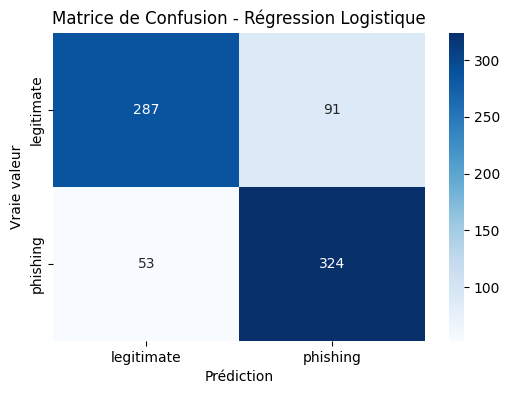

In [81]:
if 'y_test' in locals() and 'y_pred_lr' in locals():
    # Précision : Sur tout ce qui a été prédit 'phishing', combien l'était vraiment ?
    # Important pour éviter de bloquer des sites légitimes (faux positifs).
    precision_lr = precision_score(y_test, y_pred_lr, pos_label=1)

    # Rappel : Sur tout ce qui était vraiment 'phishing', combien a été détecté ?
    # Important pour ne pas manquer de sites dangereux (faux négatifs).
    recall_lr = recall_score(y_test, y_pred_lr, pos_label=1)

    print(f"Précision (pour 'phishing') : {precision_lr * 100:.2f}%")
    print(f"Rappel (pour 'phishing') : {recall_lr * 100:.2f}%")

    # Rapport détaillé par classe
    print("\nRapport de Classification (Régression Logistique) :")
    print(classification_report(y_test, y_pred_lr, target_names=traducteur.classes_))

    # Matrice de confusion : détail des Vrais/Faux Positifs/Négatifs
    print("\nMatrice de Confusion (Régression Logistique) :")
    cm_lr = confusion_matrix(y_test, y_pred_lr)

    # Visualisation de la matrice
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
                xticklabels=traducteur.classes_, yticklabels=traducteur.classes_)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie valeur')
    plt.title('Matrice de Confusion - Régression Logistique')
    plt.savefig('confusion_matrix_logistic.png', bbox_inches='tight') # Sauvegarde pour le README
    plt.show()

else:
    print("Erreur : Les variables y_test et/ou y_pred n'existent pas.")


## 5. Modélisation : Random Forest

Entraînement d'un second modèle, le Random Forest Classifier. C'est un modèle basé sur des ensembles d'arbres de décision, souvent plus performant sur des données complexes.


In [82]:
# Cellule pour importer et entraîner le RandomForest
from sklearn.ensemble import RandomForestClassifier

In [83]:
if 'X_train' in locals() and 'y_train' in locals():
    # Initialisation du modèle RandomForest
    # n_estimators=100 : utilise 100 arbres de décision
    # n_jobs=-1 : utilise tous les coeurs CPU pour accélérer l'entraînement
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    print("Modèle RandomForest créé.")

    # Entraînement du modèle
    print("Début de l'entraînement (Random Forest)...")
    model_rf.fit(X_train, y_train)
    print("Entraînement terminé !")

else:
    print("Erreur : Les variables X_train et/ou y_train n'existent pas.")

Modèle RandomForest créé.
Début de l'entraînement (Random Forest)...
Entraînement terminé !


## 6. Évaluation : Random Forest

Évaluation de la performance du modèle Random Forest sur l'ensemble de test, en utilisant les mêmes métriques que pour la Régression Logistique, afin de comparer.




Accuracy (Random Forest) : 95.89%

Rapport de Classification (Random Forest) :
              precision    recall  f1-score   support

  legitimate       0.98      0.94      0.96       378
    phishing       0.94      0.98      0.96       377

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755


Matrice de Confusion (Random Forest) :


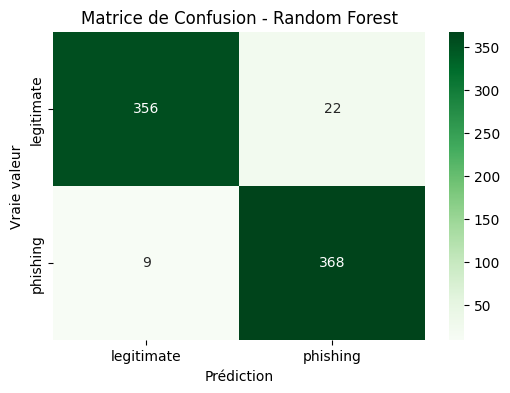

In [84]:
# (Code similaire à l'évaluation de la Régression Logistique,
# mais en utilisant rf_model et y_pred_rf)

if 'model_rf' in locals() and 'X_test' in locals():
    # Prédictions
    y_pred_rf = model_rf.predict(X_test)

    # Accuracy
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"\nAccuracy (Random Forest) : {accuracy_rf * 100:.2f}%")

    # Rapport détaillé
    print("\nRapport de Classification (Random Forest) :")
    print(classification_report(y_test, y_pred_rf, target_names=traducteur.classes_))

    # Matrice de confusion
    print("\nMatrice de Confusion (Random Forest) :")
    cm_rf = confusion_matrix(y_test, y_pred_rf)

    # Visualisation
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', # Couleur différente pour distinguer
                xticklabels=traducteur.classes_, yticklabels=traducteur.classes_)
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie valeur')
    plt.title('Matrice de Confusion - Random Forest')
    plt.savefig('confusion_matrix_rf.png', bbox_inches='tight') # Sauvegarde pour le README
    plt.show()

else:
    print("Erreur : Les variables rf_model, X_test et/ou y_test n'existent pas.")

## 7. Conclusion

Ce notebook a exploré la classification d'URLs de phishing en utilisant deux modèles de Machine Learning sur un dataset pré-caractérisé.

**Comparaison des Performances (sur l'ensemble de test) :**

| Modèle                 | Accuracy | Précision (Phishing) | Rappel (Phishing) | Faux Négatifs (Phishing manqué) |
|------------------------|----------|----------------------|-------------------|---------------------------------|
| Régression Logistique | 80.93%   | 78.07%               | 85.94%            | 53                              |
| Random Forest          | **95.89%** | **94.36%** | **97.61%** | **9** |

**Conclusion :**

Le modèle **Random Forest** est significativement plus performant que la Régression Logistique sur ce dataset, avec une **accuracy de près de 96%** et un **excellent rappel** (il manque très peu de sites de phishing). Cela suggère que les relations entre les caractéristiques des URLs et le statut de phishing sont probablement non-linéaires et mieux capturées par un modèle basé sur des arbres.

Le Random Forest serait donc le modèle à privilégier pour une mise en application.
